In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

from q_learning import QLearning
from sarsa import Sarsa
from temporal_difference import TemporalDifference
from basic_policy import BasicPolicy

n_episode = 100000
plot_test_size = 10000

In [53]:
# basic1 = BasicPolicy("v1", 0.2, gamma=0.15)
# basic1.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

basic2 = BasicPolicy("v2", 0.2, gamma=0.15)
basic2.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

# basic3 = BasicPolicy("v3", 0.2, gamma=0.15)
# basic3.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

training, episode 0 out of 100000
win: 0.4279 | draw: 0.0954 | loss: 0.4767
mean reward: -0.0488
training, episode 10000 out of 100000
win: 0.4283 | draw: 0.0958 | loss: 0.4759
mean reward: -0.0476
training, episode 20000 out of 100000
win: 0.4239 | draw: 0.0915 | loss: 0.4846
mean reward: -0.0607
training, episode 30000 out of 100000
win: 0.4274 | draw: 0.0945 | loss: 0.4781
mean reward: -0.0507
training, episode 40000 out of 100000
win: 0.4329 | draw: 0.0931 | loss: 0.474
mean reward: -0.0411
training, episode 50000 out of 100000
win: 0.4343 | draw: 0.0948 | loss: 0.4709
mean reward: -0.0366
training, episode 60000 out of 100000
win: 0.4362 | draw: 0.0936 | loss: 0.4702
mean reward: -0.034
training, episode 70000 out of 100000
win: 0.4263 | draw: 0.0906 | loss: 0.4831
mean reward: -0.0568
training, episode 80000 out of 100000
win: 0.4253 | draw: 0.0941 | loss: 0.4806
mean reward: -0.0553
training, episode 90000 out of 100000
win: 0.4271 | draw: 0.0929 | loss: 0.48
mean reward: -0.052

In [6]:
qlearning1 = QLearning("v1", 0.2, gamma=0.15)
qlearning1.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

qlearning2 = QLearning("v2", 0.2, gamma=0.15)
qlearning2.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

qlearning3 = QLearning("v3", 0.2, gamma=0.15)
qlearning3.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

training, episode 0 out of 100000
win: 0.307 | draw: 0.0448 | loss: 0.6482
mean reward: -0.3412
training, episode 10000 out of 100000
win: 0.4136 | draw: 0.0946 | loss: 0.4918
mean reward: -0.0782
training, episode 20000 out of 100000
win: 0.4214 | draw: 0.0924 | loss: 0.4862
mean reward: -0.0648
training, episode 30000 out of 100000
win: 0.4223 | draw: 0.0886 | loss: 0.4891
mean reward: -0.0668
training, episode 40000 out of 100000
win: 0.4274 | draw: 0.0958 | loss: 0.4768
mean reward: -0.0494
training, episode 50000 out of 100000
win: 0.4323 | draw: 0.0936 | loss: 0.4741
mean reward: -0.0418
training, episode 60000 out of 100000
win: 0.43 | draw: 0.0927 | loss: 0.4773
mean reward: -0.0473
training, episode 70000 out of 100000
win: 0.425 | draw: 0.0918 | loss: 0.4832
mean reward: -0.0582
training, episode 80000 out of 100000
win: 0.431 | draw: 0.0952 | loss: 0.4738
mean reward: -0.0428
training, episode 90000 out of 100000
win: 0.4239 | draw: 0.0981 | loss: 0.478
mean reward: -0.0541


In [7]:
sarsa1 = Sarsa("v1", 0.2, gamma=0.15)
sarsa1.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

sarsa2 = Sarsa("v2", 0.2, gamma=0.15)
sarsa2.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

sarsa3 = Sarsa("v3", 0.2, gamma=0.15)
sarsa3.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

training, episode 0 out of 100000
win: 0.3053 | draw: 0.0428 | loss: 0.6519
mean reward: -0.3466
training, episode 10000 out of 100000
win: 0.4225 | draw: 0.0945 | loss: 0.483
mean reward: -0.0605
training, episode 20000 out of 100000
win: 0.4278 | draw: 0.0923 | loss: 0.4799
mean reward: -0.0521
training, episode 30000 out of 100000
win: 0.4316 | draw: 0.0995 | loss: 0.4689
mean reward: -0.0373
training, episode 40000 out of 100000
win: 0.4208 | draw: 0.0967 | loss: 0.4825
mean reward: -0.0617
training, episode 50000 out of 100000
win: 0.4296 | draw: 0.0888 | loss: 0.4816
mean reward: -0.052
training, episode 60000 out of 100000
win: 0.4293 | draw: 0.0897 | loss: 0.481
mean reward: -0.0517
training, episode 70000 out of 100000
win: 0.4237 | draw: 0.098 | loss: 0.4783
mean reward: -0.0546
training, episode 80000 out of 100000
win: 0.4344 | draw: 0.0964 | loss: 0.4692
mean reward: -0.0348
training, episode 90000 out of 100000
win: 0.4254 | draw: 0.0976 | loss: 0.477
mean reward: -0.0516

In [8]:
temporal_difference1 = TemporalDifference("v1")
temporal_difference1.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

temporal_difference2 = TemporalDifference("v2")
temporal_difference2.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

temporal_difference3 = TemporalDifference("v3")
temporal_difference3.train(n_episode, plot=True, plot_interval=10000, plot_test_size=plot_test_size)

training, episode 0 out of 100000
win: 0.2677 | draw: 0.035 | loss: 0.6973
mean reward: -0.4296
training, episode 10000 out of 100000
win: 0.4168 | draw: 0.0899 | loss: 0.4933
mean reward: -0.0765
training, episode 20000 out of 100000
win: 0.427 | draw: 0.0923 | loss: 0.4807
mean reward: -0.0537
training, episode 30000 out of 100000
win: 0.4224 | draw: 0.0863 | loss: 0.4913
mean reward: -0.0689
training, episode 40000 out of 100000
win: 0.4223 | draw: 0.0902 | loss: 0.4875
mean reward: -0.0652
training, episode 50000 out of 100000
win: 0.4276 | draw: 0.0903 | loss: 0.4821
mean reward: -0.0545
training, episode 60000 out of 100000
win: 0.4292 | draw: 0.0881 | loss: 0.4827
mean reward: -0.0535
training, episode 70000 out of 100000
win: 0.4239 | draw: 0.089 | loss: 0.4871
mean reward: -0.0632
training, episode 80000 out of 100000
win: 0.4305 | draw: 0.0897 | loss: 0.4798
mean reward: -0.0493
training, episode 90000 out of 100000
win: 0.4343 | draw: 0.0848 | loss: 0.4809
mean reward: -0.04

In [14]:
from dqn import DQNAgent
from env_v1 import BlackjackEnv
from env_v2 import BlackjackDoubleDownEnv
from env_v3 import BlackjackDoubleDownSplitEnv

dqn1 = DQNAgent(
    BlackjackEnv(),
    max_memory_size=30000,
    batch_size=128,
    gamma=0.2,
    lr=0.0025,
    epsilon=0.01
)
dqn1.train(n_episode=n_episode, plot=True, plot_interval=10000, plot_test_size=10000)

dqn2 = DQNAgent(
    BlackjackDoubleDownEnv(),
    max_memory_size=30000,
    batch_size=128,
    gamma=0.2,
    lr=0.0025,
    epsilon=0.01
)
dqn2.train(n_episode=n_episode, plot=True, plot_interval=10000, plot_test_size=10000)

dqn3 = DQNAgent(
    BlackjackDoubleDownSplitEnv(),
    max_memory_size=30000,
    batch_size=128,
    gamma=0.2,
    lr=0.0025,
    epsilon=0.01
)
dqn3.train(n_episode=n_episode, plot=True, plot_interval=10000, plot_test_size=10000)

training, episode 0 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 4761.92it/s]


win: 0.3807 | draw: 0.0523 | loss: 0.567
mean reward: -0.1863
training, episode 10000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3256.18it/s]


win: 0.4154 | draw: 0.0968 | loss: 0.4878
mean reward: -0.0724
training, episode 20000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3338.13it/s]


win: 0.4107 | draw: 0.0943 | loss: 0.495
mean reward: -0.0843
training, episode 30000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3189.66it/s]


win: 0.4252 | draw: 0.0921 | loss: 0.4827
mean reward: -0.0575
training, episode 40000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3073.20it/s]


win: 0.4161 | draw: 0.0995 | loss: 0.4844
mean reward: -0.0683
training, episode 50000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3139.84it/s]


win: 0.4338 | draw: 0.092 | loss: 0.4742
mean reward: -0.0404
training, episode 60000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3301.65it/s]


win: 0.4253 | draw: 0.0944 | loss: 0.4803
mean reward: -0.055
training, episode 70000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3399.57it/s]


win: 0.4213 | draw: 0.0966 | loss: 0.4821
mean reward: -0.0608
training, episode 80000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3407.86it/s]


win: 0.4209 | draw: 0.0966 | loss: 0.4825
mean reward: -0.0616
training, episode 90000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3293.22it/s]


win: 0.4191 | draw: 0.0965 | loss: 0.4844
mean reward: -0.0653
training, episode 0 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 4871.36it/s]


win: 0.3784 | draw: 0.0477 | loss: 0.5739
mean reward: -0.1968
training, episode 10000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3580.67it/s]


win: 0.4166 | draw: 0.0952 | loss: 0.4882
mean reward: -0.1225
training, episode 20000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3395.82it/s]


win: 0.4249 | draw: 0.0984 | loss: 0.4767
mean reward: -0.0965
training, episode 30000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3209.50it/s]


win: 0.4153 | draw: 0.0934 | loss: 0.4913
mean reward: -0.1189
training, episode 40000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3689.64it/s]


win: 0.4132 | draw: 0.0894 | loss: 0.4974
mean reward: -0.1028
training, episode 50000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3444.99it/s]


win: 0.4137 | draw: 0.0954 | loss: 0.4909
mean reward: -0.1181
training, episode 60000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3793.76it/s]


win: 0.4124 | draw: 0.0988 | loss: 0.4888
mean reward: -0.139
training, episode 70000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3536.93it/s]


win: 0.4164 | draw: 0.0958 | loss: 0.4878
mean reward: -0.1143
training, episode 80000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3540.01it/s]


win: 0.419 | draw: 0.0955 | loss: 0.4855
mean reward: -0.1014
training, episode 90000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3870.74it/s]


win: 0.4219 | draw: 0.0868 | loss: 0.4913
mean reward: -0.0808
training, episode 0 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 2801.28it/s]


win: 0.004299140171965607 | draw: 9.998000399920016e-05 | loss: 0.9956008798240352
mean reward: -1.0991801639672065
training, episode 10000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3149.11it/s]


win: 0.42527054694355076 | draw: 0.09271716876279613 | loss: 0.4820122842936531
mean reward: -0.1396119723115921
training, episode 20000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3144.03it/s]


win: 0.41416119870727647 | draw: 0.09783566741749095 | loss: 0.4880031338752326
mean reward: -0.16041523846831848
training, episode 30000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3069.56it/s]


win: 0.41605698883326914 | draw: 0.09742010011551791 | loss: 0.4865229110512129
mean reward: -0.1853099730458221
training, episode 40000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 2940.28it/s]


win: 0.42413894038442773 | draw: 0.09698507171431359 | loss: 0.4788759879012587
mean reward: -0.17874914625817154
training, episode 50000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3346.87it/s]


win: 0.4073253012048193 | draw: 0.09744578313253012 | loss: 0.4952289156626506
mean reward: -0.16356626506024097
training, episode 60000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3274.80it/s]


win: 0.4243389307083575 | draw: 0.09370777842115421 | loss: 0.4819532908704883
mean reward: -0.16599112140513414
training, episode 70000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3407.20it/s]


win: 0.41967621419676215 | draw: 0.09502825941182105 | loss: 0.4852955263914168
mean reward: -0.15269661845004312
training, episode 80000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:03<00:00, 3168.72it/s]


win: 0.4176024570496209 | draw: 0.09089164027257894 | loss: 0.4915059026778002
mean reward: -0.16431519339667913
training, episode 90000 out of 100000
Gather ploting information


100%|██████████| 10000/10000 [00:02<00:00, 3413.42it/s]


win: 0.412003087610961 | draw: 0.09349671941335391 | loss: 0.49450019297568504
mean reward: -0.15959089154766498


In [47]:
def compare_env(datas, value="reward", label=["Stick & Hit", "Stick, Hit & Double Down", "Stick, Hit, Double Down & Split"]):
    sns.set(rc={"figure.figsize":(10, 6)}) #width=3, #height=4
    # plt.ylim(-1, 0)
    for i, data in enumerate(datas):
        plot = sns.lineplot(data=data, x="n", y=value, label=label[i])

In [67]:
def compare_algorithm(datas, value="reward", label=["Q-Learning", "Sarsa", "Temporal Difference", "Deep Q-Learning", "Basic Policy"]):
    sns.set(rc={"figure.figsize":(10, 6)}) #width=3, #height=4
    # plt.ylim(-1, 0)
    for i, data in enumerate(datas):
        plot = sns.lineplot(data=data, x="n", y=value, label=label[i])
    plot.figure.savefig("output.png")

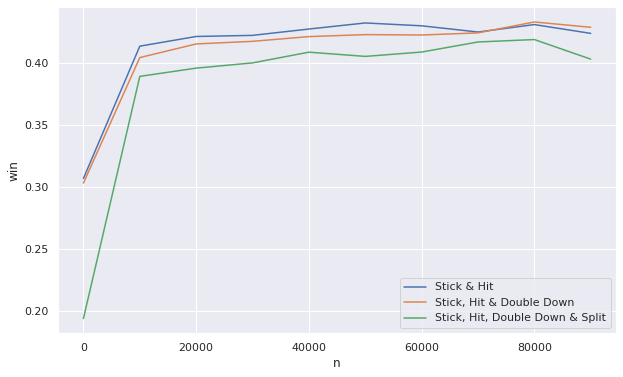

In [49]:
compare_env([qlearning1.plot, qlearning2.plot, qlearning3.plot], value="win")

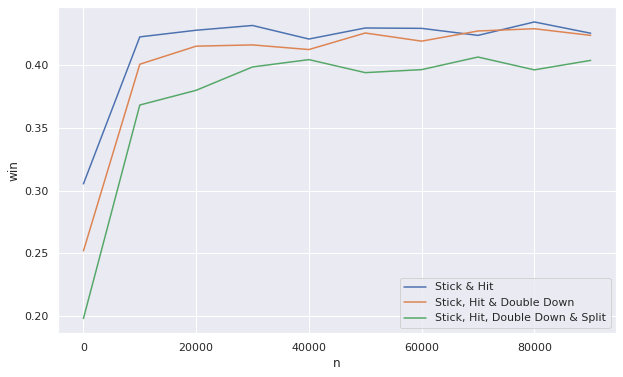

In [12]:
compare_env([sarsa1.plot, sarsa2.plot, sarsa3.plot], value="win")

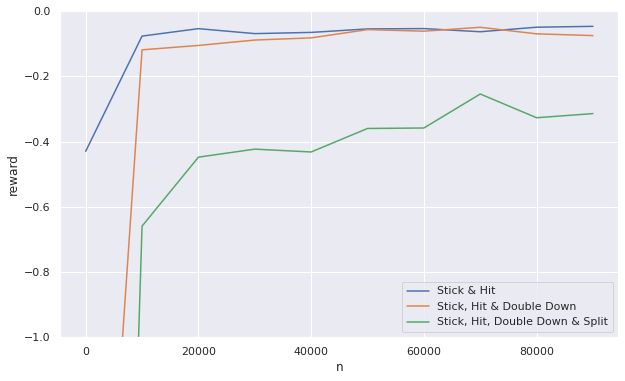

In [36]:
compare_env([temporal_difference1.plot, temporal_difference2.plot, temporal_difference3.plot], value="reward")

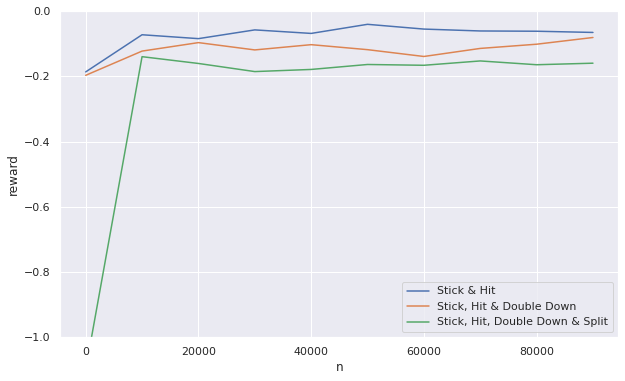

In [37]:
compare_env([dqn1.plot, dqn2.plot, dqn3.plot], value="reward")


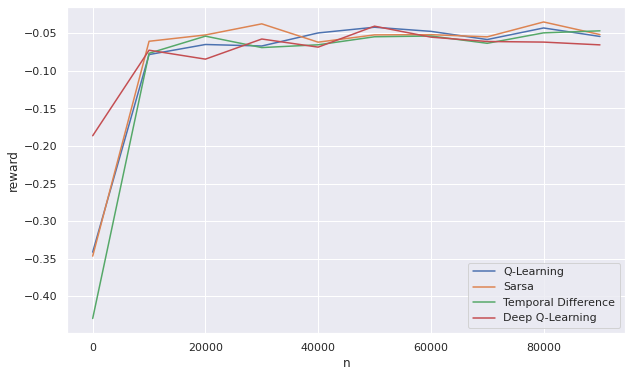

In [24]:
compare_algorithm([qlearning1.plot, sarsa1.plot, temporal_difference1.plot, dqn1.plot], value="reward")

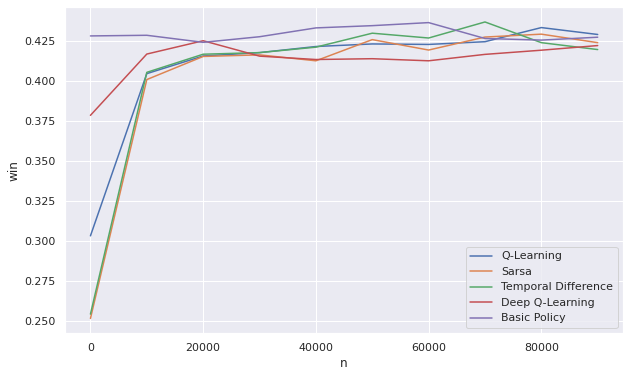

In [70]:
compare_algorithm([qlearning2.plot, sarsa2.plot, temporal_difference2.plot, dqn2.plot, basic2.plot], value="win")

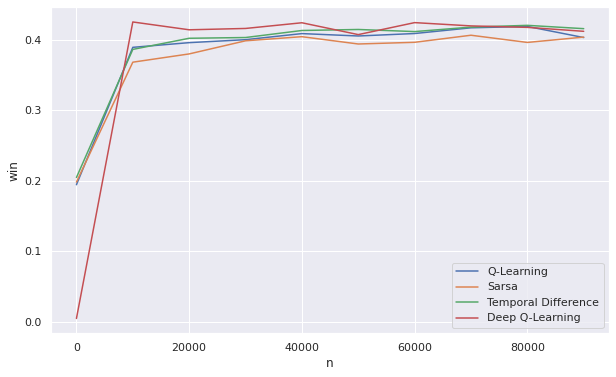

In [68]:
compare_algorithm([qlearning3.plot, sarsa3.plot, temporal_difference3.plot, dqn3.plot], value="win")

In [33]:
import pandas as pd
import numpy as np
import torch

def tablePrintResult(integer):
    if integer ==0:
        return "S"

    elif integer ==1:
        return "H"
    else:
        return "DD"


num_row, num_column = 17,10
table = np.zeros((num_row,num_column))
table_str_hard = np.empty_like(table, dtype=str)

for i in range(num_row):
    for j in range(num_column):
        observation = (4+i,1+j,0,1)
        table_str_hard[i,j] = tablePrintResult(dqn2.act(torch.Tensor([observation]), False))


df = pd.DataFrame(table_str_hard)
df.to_csv("../figures/table_dqn_strategy_hard.csv")

num_row_soft, num_column_soft = 9,10
table = np.zeros((num_row_soft,num_column_soft))
table_str_hard = np.empty_like(table, dtype=str)

for i in range(num_row_soft):
    for j in range(num_column_soft):
        observation = (i+13,1+j,1,1)
        table_str_hard[i,j] = tablePrintResult(dqn2.act(torch.Tensor([observation]), False))


df = pd.DataFrame(table_str_hard)
df.to_csv("../figures/table_dqn_strategy_soft.csv")
